In [2]:
#Import all required libraries
import pandas as pd
import numpy as np


#plots
import matplotlib.pyplot as plt
import seaborn as sns

# Read training data

In [3]:
df = pd.read_csv("2020_Fall_training_dataset/training_data.csv")
df

FileNotFoundError: [Errno 2] File 2020_Fall_training_dataset/training_data.csv does not exist: '2020_Fall_training_dataset/training_data.csv'

# Basic data cleaning

In [3]:
# Drop unwanted columns
columns_to_drop = ['PolicyNo', 'Policy_Installment_Term','Policy_Method_Of_Payment',
'Policy_Reinstatement_Fee_Indicator',
'Policy_Zip_Code_Garaging_Location',
'Vehicle_Make_Description',
'Vehicle_New_Cost_Amount',
'Driver_Total',
'Driver_Total_Male',
'Driver_Total_Female',
'Driver_Total_Related_To_Insured_Self',
'Driver_Total_Related_To_Insured_Spouse',
'Driver_Total_Related_To_Insured_Child',
'Driver_Total_Licensed_In_State',
'Vehicle_Youthful_Driver_Indicator',
'Vehicle_Youthful_Driver_Training_Code',
'EEA_Multi_Auto_Policies_Indicator',
'EEA_Policy_Zip_Code_3',
'EEA_Agency_Type',
'EEA_PolicyYear',
'SYS_Renewed',
'SYS_New_Business']
df.drop(columns_to_drop, inplace=True, axis=1)


df.head()

,Policy_Company,Policy_Billing_Code,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Usage,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,...,EEA_Policy_Tenure,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,Standard,Direct Billed to Insured,35,2004,Standard,11,1,Farm,-1,5,...,22.7,N,Y,100-400,320.12,0,0.0,0.0,0.0,0.0
1,Standard,Direct Billed to Insured,35,1980,Standard,11,1,Farm,-1,5,...,47.1,N,Y,100-200,259.70,0,0.0,0.0,0.0,0.0
2,Standard,Direct Billed to Insured,17,2005,Standard,10,1,Pleasure,-1,5,...,47.2,N,Y,100-400,613.74,0,0.0,0.0,0.0,0.0
3,Standard,Direct Billed to Insured,17,2005,Standard,12,1,Pleasure,-1,5,...,46.7,Y,Y,40-100,541.66,0,0.0,0.0,0.0,0.0
4,Standard,Direct Billed to Insured,17,2005,Standard,12,1,Pleasure,-1,5,...,47.2,Y,Y,40-100,541.66,0,0.0,0.0,0.0,0.0


In [4]:
# display data type count
df.dtypes.value_counts()

int64      25
object     16
float64     6
dtype: int64

In [5]:
# Check data has the proper index
df.index

RangeIndex(start=0, stop=424431, step=1)

In [6]:
# Check for total how many attributes with null values present
df.isnull().sum()

Policy_Company                                  0
Policy_Billing_Code                             0
Vehicle_Territory                               0
Vehicle_Make_Year                               0
Vehicle_Performance                             0
Vehicle_Symbol                                  0
Vehicle_Number_Of_Drivers_Assigned              0
Vehicle_Usage                                   0
Vehicle_Miles_To_Work                           0
Vehicle_Days_Per_Week_Driven                    0
Vehicle_Annual_Miles                            0
Vehicle_Anti_Theft_Device                       0
Vehicle_Passive_Restraint                       0
Vehicle_Age_In_Years                            0
Vehicle_Med_Pay_Limit                           0
Vehicle_Bodily_Injury_Limit                 17326
Vehicle_Physical_Damage_Limit                   0
Vehicle_Comprehensive_Coverage_Indicator        0
Vehicle_Comprehensive_Coverage_Limit            0
Vehicle_Collision_Coverage_Indicator            0


In [7]:
# Determine the percentage of null in column with null values
print(df['Vehicle_Bodily_Injury_Limit'].isnull().sum() / len(df))
print(df['EEA_Prior_Bodily_Injury_Limit'].isnull().sum() / len(df))

# Ignored as null values are just 4% of total dataset

0.040821711891921186
0.040821711891921186


In [8]:
df['Vehicle_Bodily_Injury_Limit'].unique()

array(['250-500', '100-300', '50-100 ', '25-50  ', nan, '300-500',
       '100-500', '500-500', '1M-1M  '], dtype=object)

In [9]:
#Strip extra spaces in column values
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].str.strip()

# Fill NaN with mode
mode = df['Vehicle_Bodily_Injury_Limit'].value_counts().idxmax()

df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(mode)


df['Vehicle_Bodily_Injury_Limit'].unique()

array(['250-500', '100-300', '50-100', '25-50', '300-500', '100-500',
       '500-500', '1M-1M'], dtype=object)

In [10]:
df['EEA_Prior_Bodily_Injury_Limit'].unique()

array(['100-400', '100-200', '40-100 ', '20-50', nan, '200-400', '75-300',
       '300-300', '750-750'], dtype=object)

In [11]:
# Fill NaN with mode

mode = df['EEA_Prior_Bodily_Injury_Limit'].value_counts().idxmax()

df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(mode)


df['EEA_Prior_Bodily_Injury_Limit'].unique()

array(['100-400', '100-200', '40-100 ', '20-50', '200-400', '75-300',
       '300-300', '750-750'], dtype=object)

# Analysing and visualizing the data correlation using heatmap

<AxesSubplot:title={'center':'Heatmap of Correlation matrix'}>

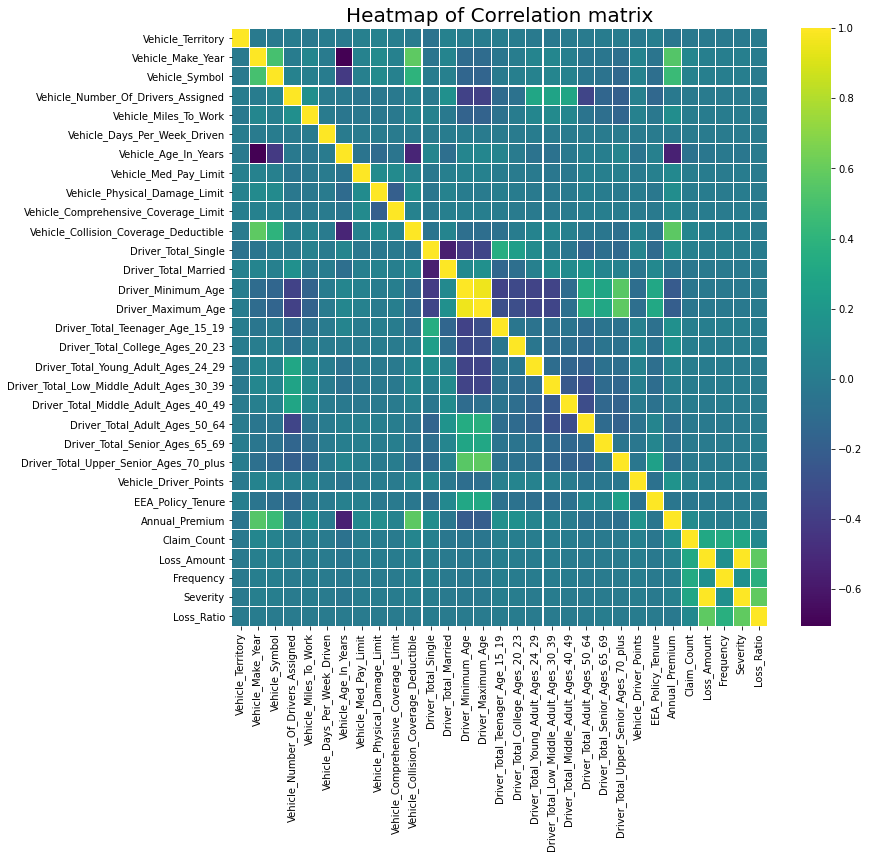

In [12]:
# Correlation matrix showing correlation coefficients between variables.
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize = (12, 11) ) 
plt.title('Heatmap of Correlation matrix', fontsize = 20) 
sns.heatmap(correlation_matrix,ax = ax,cmap="viridis", linewidths = 0.1)

<AxesSubplot:>

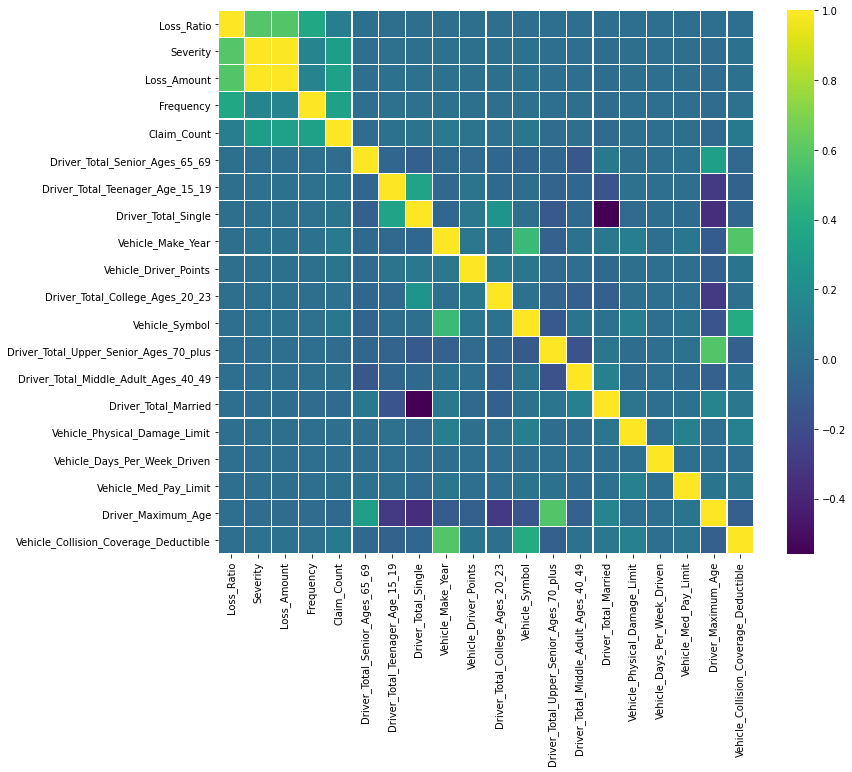

In [13]:
# Check for correlation matrix of the target element - Loss Ratio: Print matrix with top 20 attributes with correlation 

k = 20
target_col = correlation_matrix.nlargest(k, 'Loss_Ratio')['Loss_Ratio'].index
cm = np.corrcoef(df[target_col].values.T)
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap="viridis", 
            linewidths = 0.2, yticklabels = target_col.values,  
                              xticklabels = target_col.values) 

# Save cleaned data to a file

In [14]:
# save to csv file
df.to_csv("2020_Fall_training_dataset/training_dataset_cleaned.csv", index=False)
print("Done!")

Done!
